In [0]:
#Barcelona registered Unemploymentrate

In [2]:
import pandas as pd
import glob
import numpy as np
import geopandas
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
!pip3 install bokeh
from bokeh.plotting import figure, show
from matplotlib.pyplot import figure
import geopandas


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# get data file names
path ='./unemployment'
filenames = glob.glob(path + "/*.csv")
print(filenames)

['./unemployment/2019_Atur_per_sexe.csv', './unemployment/2020_Atur_per_sexe.csv', './unemployment/2021_Atur_per_sexe.csv']


In [4]:
# read all the *.csv inside unemployment 

unemployment = []
for file in filenames:
    df_per_year = pd.read_csv(file)
    unemployment.append(df_per_year)
    print(f'Size of {file}: {df_per_year.shape}')

Size of ./unemployment/2019_Atur_per_sexe.csv: (3552, 9)


Size of ./unemployment/2020_Atur_per_sexe.csv: (3552, 9)
Size of ./unemployment/2021_Atur_per_sexe.csv: (592, 9)


In [5]:
# combine all dataframe 
df = pd.concat(unemployment, axis=0, ignore_index=True)
print(df.shape)
df.head(2)

(7696, 9)


,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Demanda_ocupacio,Nombre
0,2019,1,1,Ciutat Vella,1,el Raval,Homes,Atur registrat,1900
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Homes,Atur registrat,485


In [6]:
df = df.rename(columns={'Any':'year',
                   'Mes':'month', 
                   'Codi_Districte':'district_code', 
                   'Nom_Districte':'district_name', 
                   'Codi_Barri':'neighbourhood_code', 
                   'Nom_Barri':'neighbourhood_name', 
                'Sexe':'sex','Demanda_ocupacio':'Demand_occupation',
                   'Nombre':'number', })
df.head(2)

,year,month,district_code,district_name,neighbourhood_code,neighbourhood_name,sex,Demand_occupation,number
0,2019,1,1,Ciutat Vella,1,el Raval,Homes,Atur registrat,1900
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Homes,Atur registrat,485


#### Downloaded Csv files didn't have all same format so i separated them into two folders, and changed the name and concat them again

#### Let's do the second part 

In [7]:
# get data file names
path ='./unemployment/unemployment2'
filenames = glob.glob(path + "/*.csv")
print(filenames)

['./unemployment/unemployment2/2013_atur_per_sexe.csv', './unemployment/unemployment2/2015_atur_per_sexe.csv', './unemployment/unemployment2/2012_atur_per_sexe.csv', './unemployment/unemployment2/2014_atur_per_sexe.csv', './unemployment/unemployment2/2011_atur_per_sexe.csv', './unemployment/unemployment2/2017_atur_per_sexe.csv', './unemployment/unemployment2/2018_Atur_per_sexe.csv', './unemployment/unemployment2/2016_atur_per_sexe.csv']


In [8]:
# read all the *.csv inside unemployment 

unemployment2 = []
for file in filenames:
    df_per_year = pd.read_csv(file)
    unemployment2.append(df_per_year)
    print(f'Size of {file}: {df_per_year.shape}')

Size of ./unemployment/unemployment2/2013_atur_per_sexe.csv: (1776, 9)
Size of ./unemployment/unemployment2/2015_atur_per_sexe.csv: (3552, 9)
Size of ./unemployment/unemployment2/2012_atur_per_sexe.csv: (1776, 9)


Size of ./unemployment/unemployment2/2014_atur_per_sexe.csv: (1776, 9)
Size of ./unemployment/unemployment2/2011_atur_per_sexe.csv: (1776, 9)


Size of ./unemployment/unemployment2/2017_atur_per_sexe.csv: (3552, 9)
Size of ./unemployment/unemployment2/2018_Atur_per_sexe.csv: (3552, 9)
Size of ./unemployment/unemployment2/2016_atur_per_sexe.csv: (3552, 9)


In [9]:
# combine all dataframe 
df2 = pd.concat(unemployment2, axis=0, ignore_index=True)
print(df.shape)
df2.head(2)

(7696, 9)


,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Demanda_ocupació,Nombre
0,2013,1,1,Ciutat Vella,1,el Raval,Homes,Atur registrat,3012
1,2013,1,1,Ciutat Vella,2,el Barri Gòtic,Homes,Atur registrat,799


In [10]:
df2 = df2.rename(columns={'Any':'year',
                   'Mes':'month', 
                   'Codi_Districte':'district_code', 
                   'Nom_Districte':'district_name', 
                   'Codi_Barri':'neighbourhood_code', 
                   'Nom_Barri':'neighbourhood_name', 
                'Sexe':'sex','Demanda_ocupació':'Demand_occupation',
                   'Nombre':'number', })
df2.head(2)

,year,month,district_code,district_name,neighbourhood_code,neighbourhood_name,sex,Demand_occupation,number
0,2013,1,1,Ciutat Vella,1,el Raval,Homes,Atur registrat,3012
1,2013,1,1,Ciutat Vella,2,el Barri Gòtic,Homes,Atur registrat,799


In [11]:
df=pd.DataFrame(df)
df2=pd.DataFrame(df2)

In [12]:
df2['year'].unique()

array([2013, 2015, 2012, 2014, 2011, 2017, 2018, 2016])

In [13]:
final= pd.concat([df, df2], ignore_index=True)

#### I combined all datasets

In [32]:
print("final shape is" ,final.shape)
final.head(2)

final shape is (29008, 9)


,year,month,district_code,district_name,neighbourhood_code,neighbourhood_name,sex,Demand_occupation,number
0,2019,1,1,Ciutat Vella,1,el Raval,Homes,Atur registrat,1900
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Homes,Atur registrat,485


#### Transalte the values 

In [35]:
final['Demand_occupation']=final['Demand_occupation'].replace(
    {'Atur registrat': 'Registered Unemployment'})
final['Demand_occupation']=final['Demand_occupation'].replace(
    {'Demanda no aturats':'Unemployed Demand'})
final['Demand_occupation']=final['Demand_occupation'].replace(
   {'Atur Registrat':'Registered Unemployment'})
final['Demand_occupation']=final['Demand_occupation'].replace(
    {'Demanda No Aturats':'Unstoppable Demand'})


In [36]:
final

,year,month,district_code,district_name,neighbourhood_code,neighbourhood_name,sex,Demand_occupation,number
0,2019,1,1,Ciutat Vella,1,el Raval,Homes,Registered Unemployment,1900
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Homes,Registered Unemployment,485
2,2019,1,1,Ciutat Vella,3,la Barceloneta,Homes,Registered Unemployment,496
3,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Homes,Registered Unemployment,686
4,2019,1,2,Eixample,5,el Fort Pienc,Homes,Registered Unemployment,539
...,...,...,...,...,...,...,...,...,...
29003,2016,12,10,Sant Martí,70,el Besòs i el Maresme,Dones,Unemployed Demand,167
29004,2016,12,10,Sant Martí,71,Provençals del Poblenou,Dones,Unemployed Demand,122
29005,2016,12,10,Sant Martí,72,Sant Martí de Provençals,Dones,Unemployed Demand,180
29006,2016,12,10,Sant Martí,73,la Verneda i la Pau,Dones,Unemployed Demand,205


#### EDA 

In [37]:
final_2011_graph=final[final['year']==2011]
final_2012_graph=final[final['year']==2012]
final_2013_graph=final[final['year']==2013]
final_2014_graph=final[final['year']==2014]
final_2015_graph=final[final['year']==2015]
final_2016_graph=final[final['year']==2016]
final_2017_graph=final[final['year']==2017]
final_2018_graph=final[final['year']==2018]
final_2019_graph=final[final['year']==2019]
final_2020_graph=final[final['year']==2020]
final_2021_graph=final[final['year']==2021]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


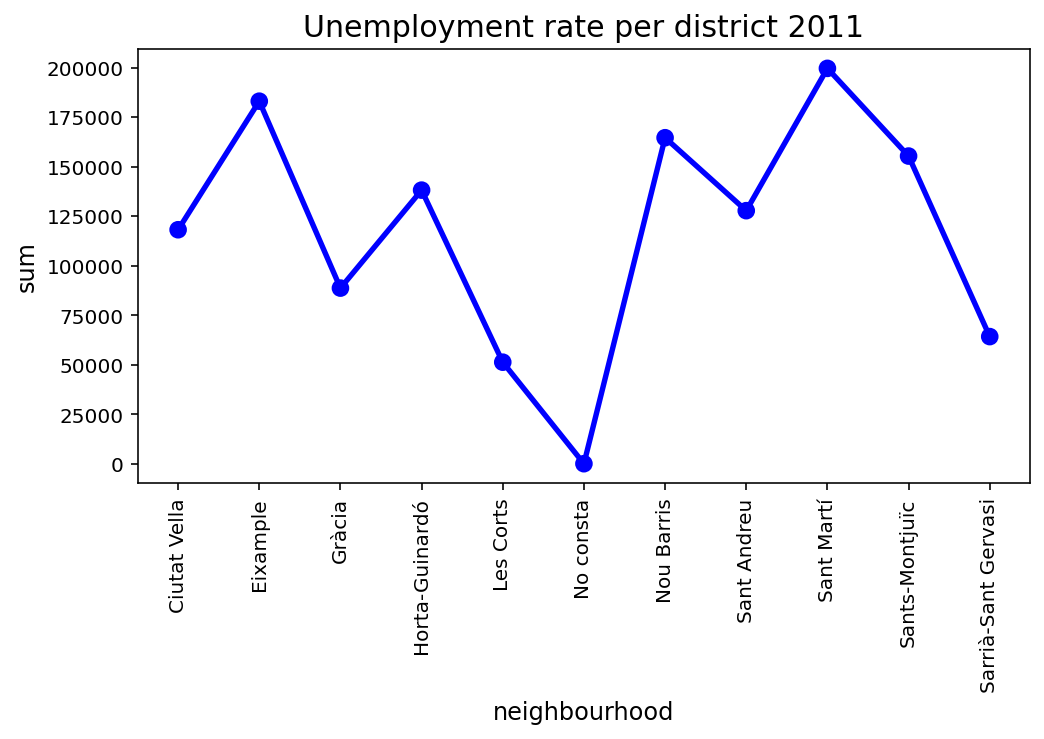

In [38]:
grouped_df = final_2011_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()

plt.figure(figsize=(8,4))
sns.pointplot(grouped_df['district_name'].values, grouped_df['number'].values, alpha=0.8, color='blue')
plt.ylabel('sum', fontsize=12)
plt.xlabel('neighbourhood', fontsize=12)
plt.title("Unemployment rate per district 2011", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


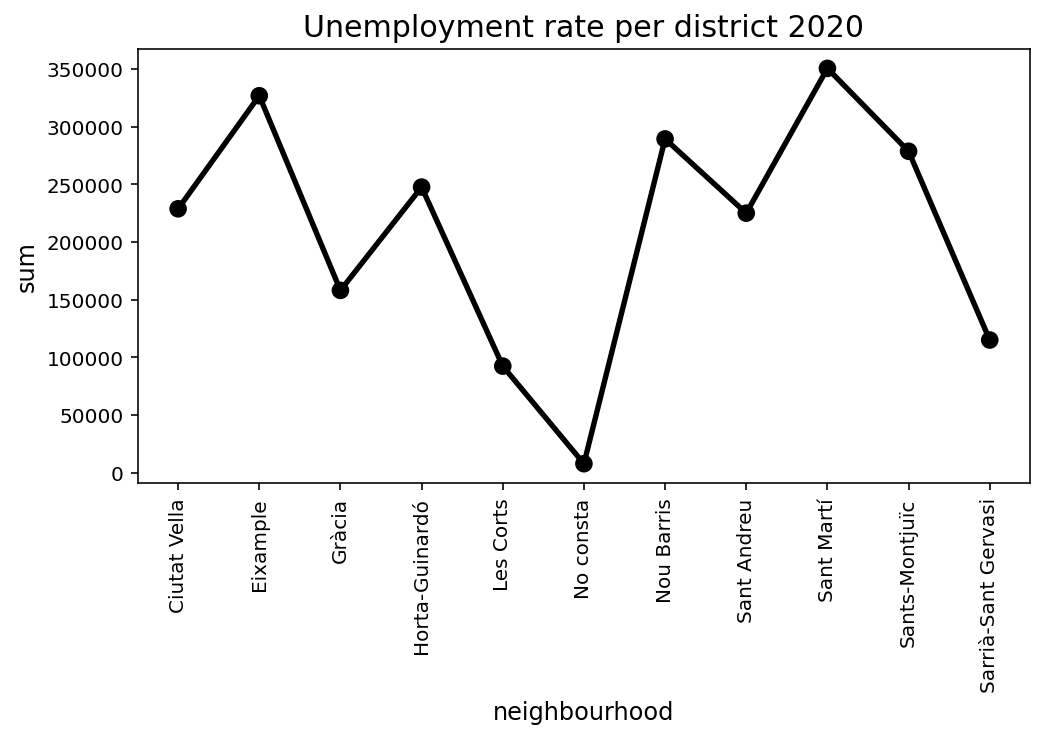

In [108]:
grouped_df_3 = final_2020_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()

plt.figure(figsize=(8,4))
sns.pointplot(grouped_df_3['district_name'].values, grouped_df_3['number'].values, alpha=0.8, color='black')
plt.ylabel('sum', fontsize=12)
plt.xlabel('neighbourhood', fontsize=12)
plt.title("Unemployment rate per district 2020", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
grouped_df_2011 = final_2011_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2012 = final_2012_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2013 = final_2013_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2014 = final_2014_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2015 = final_2015_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2016 = final_2016_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2017 = final_2017_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2018 = final_2018_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2019 = final_2019_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2020 = final_2020_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()
grouped_df_2021 = final_2021_graph.groupby(["district_name"])["number"].aggregate("sum").reset_index()

In [42]:
grouped_df_2011=grouped_df_2011.rename(columns = {'number': '2011'}, inplace = False)
grouped_df_2012=grouped_df_2012.rename(columns = {'number': '2012'}, inplace = False)
grouped_df_2013=grouped_df_2013.rename(columns = {'number': '2013'}, inplace = False)
grouped_df_2014=grouped_df_2014.rename(columns = {'number': '2014'}, inplace = False)
grouped_df_2015=grouped_df_2015.rename(columns = {'number': '2015'}, inplace = False)
grouped_df_2016=grouped_df_2016.rename(columns = {'number': '2016'}, inplace = False)
grouped_df_2017=grouped_df_2017.rename(columns = {'number': '2017'}, inplace = False)
grouped_df_2018=grouped_df_2018.rename(columns = {'number': '2018'}, inplace = False)
grouped_df_2019=grouped_df_2019.rename(columns = {'number': '2019'}, inplace = False)
grouped_df_2020=grouped_df_2020.rename(columns = {'number': '2020'}, inplace = False)
grouped_df_2021=grouped_df_2021.rename(columns = {'number': '2021'}, inplace = False)


#### so I just realised that I can just make a dataframe first so I am going to create all lists. I am not using functions for today

In [43]:
merging=grouped_df_2011.merge(grouped_df_2012, on='district_name', how='left')
merging2=merging.merge(grouped_df_2013, on='district_name', how='left')
merging3=merging2.merge(grouped_df_2014, on='district_name', how='left')
merging4=merging3.merge(grouped_df_2015, on='district_name', how='left')
merging5=merging4.merge(grouped_df_2016, on='district_name', how='left')
merging6=merging5.merge(grouped_df_2017, on='district_name', how='left')
merging7=merging6.merge(grouped_df_2018, on='district_name', how='left')
merging8=merging7.merge(grouped_df_2019, on='district_name', how='left')
merging9=merging8.merge(grouped_df_2020, on='district_name', how='left')
merging10=merging9.merge(grouped_df_2021, on='district_name', how='left')


In [44]:
clean_data=merging10
clean_data

,district_name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Ciutat Vella,118149,117112,111245,103594,119131,108314,101100,98460,95093,228851,49449
1,Eixample,183018,192024,185128,169837,190472,169554,156307,146046,142896,326875,71553
2,Gràcia,88700,92968,89141,81295,91576,81524,74763,71030,69825,158087,34195
3,Horta-Guinardó,138138,146129,145411,135543,150144,134106,122615,116384,113520,247672,53718
4,Les Corts,51314,53511,52504,49570,56920,50409,45267,42923,41698,92425,20200
5,No consta,86,75,54,62,131,177,245,155,231,7791,1159
6,Nou Barris,164580,175513,177627,167536,185439,165362,151558,145545,141797,289440,62107
7,Sant Andreu,127773,134283,134783,126632,143754,126461,113962,109120,106466,225072,48470
8,Sant Martí,199582,210091,211972,197409,220456,196603,181531,170626,164820,350628,75465
9,Sants-Montjuïc,155330,161061,158068,150748,169975,150737,137051,130941,126222,278743,60616


<AxesSubplot:xlabel='district_name'>

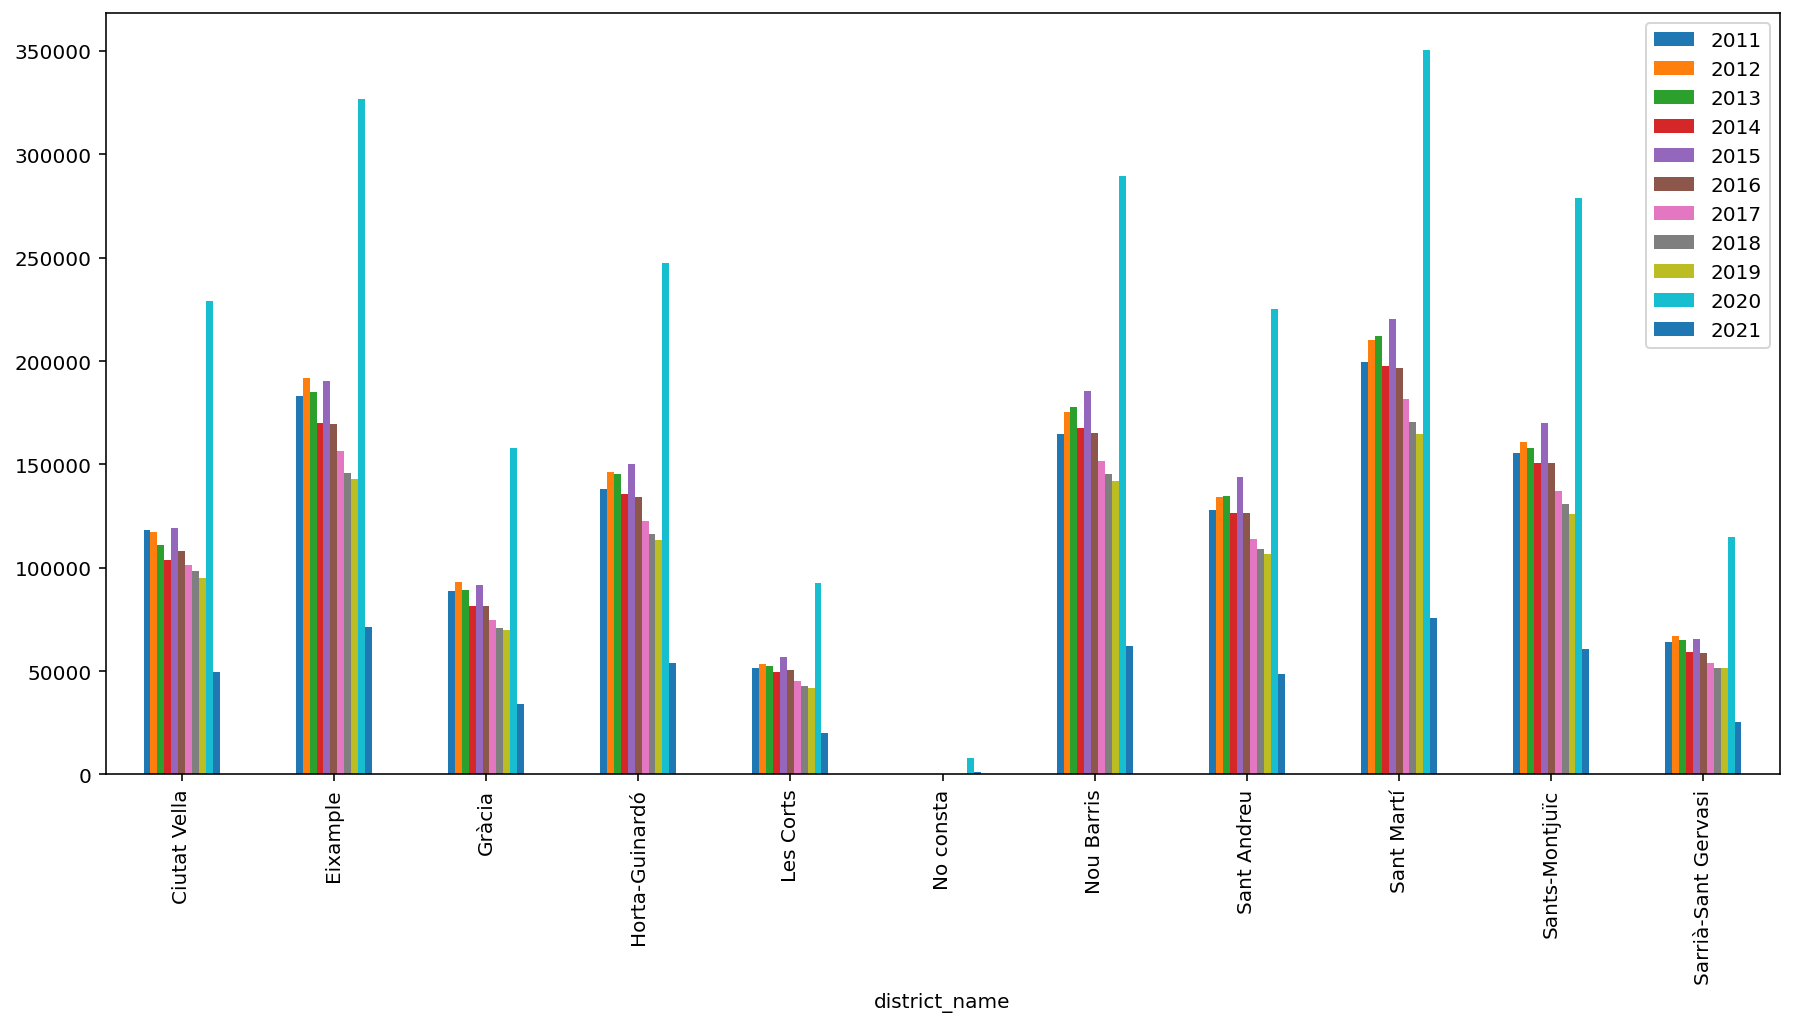

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
clean_data.plot(x="district_name", y=["2011", "2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021"], kind="bar")



####  The unemployment rate of Barcelona increased dramatically in 2020

####No consta has the lowest unemplyoment rate 
####Sant Marti has the highest unemployemnt rate 


#### next idea is showing the geo map
#### another idea is bringing covid data 



In [54]:
# get data file names

District = geopandas.read_file("./data/districts.geojson")
print(District.shape)
print(District.columns)
District.head(1)

Neighbourhood = geopandas.read_file("./data/neighborhoods.geojson")
print(Neighbourhood.shape)
print(Neighbourhood.columns)
Neighbourhood.head(1)

(10, 47)
Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')
(73, 47)
Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."


In [64]:
geo_barcelona = District[['DISTRICTE', 'NOM', 'geometry']]
geo_barcelona=geo_barcelona.rename(columns={'DISTRICTE':'district_code','NOM':'district_name','geometry':'geometry'},inplace=False)
geo_barcelona

,district_code,district_name,geometry
0,01,Ciutat Vella,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,02,Eixample,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,03,Sants-Montjuïc,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,04,Les Corts,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,05,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,06,Gràcia,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,07,Horta-Guinardó,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,08,Nou Barris,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,09,Sant Andreu,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,10,Sant Martí,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [68]:
geo_all=clean_data.merge(geo_barcelona,on='district_name',how='right')
geo_all

,district_name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,district_code,geometry
0,Ciutat Vella,118149,117112,111245,103594,119131,108314,101100,98460,95093,228851,49449,01,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,Eixample,183018,192024,185128,169837,190472,169554,156307,146046,142896,326875,71553,02,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,Sants-Montjuïc,155330,161061,158068,150748,169975,150737,137051,130941,126222,278743,60616,03,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,Les Corts,51314,53511,52504,49570,56920,50409,45267,42923,41698,92425,20200,04,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,Sarrià-Sant Gervasi,64228,66886,65280,59365,65740,58837,53710,51698,51319,115059,25531,05,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,Gràcia,88700,92968,89141,81295,91576,81524,74763,71030,69825,158087,34195,06,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,Horta-Guinardó,138138,146129,145411,135543,150144,134106,122615,116384,113520,247672,53718,07,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,Nou Barris,164580,175513,177627,167536,185439,165362,151558,145545,141797,289440,62107,08,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,Sant Andreu,127773,134283,134783,126632,143754,126461,113962,109120,106466,225072,48470,09,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,Sant Martí,199582,210091,211972,197409,220456,196603,181531,170626,164820,350628,75465,10,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [97]:
clean_2011=geo_all[['district_name','2011','geometry']]
clean_2020=geo_all[['district_name','2020','geometry']]

In [89]:
clean_2011.columns

Index(['district_name', '2011', 'geometry'], dtype='object')

#### let me just compare the dataset between 2011 and 2020-2021

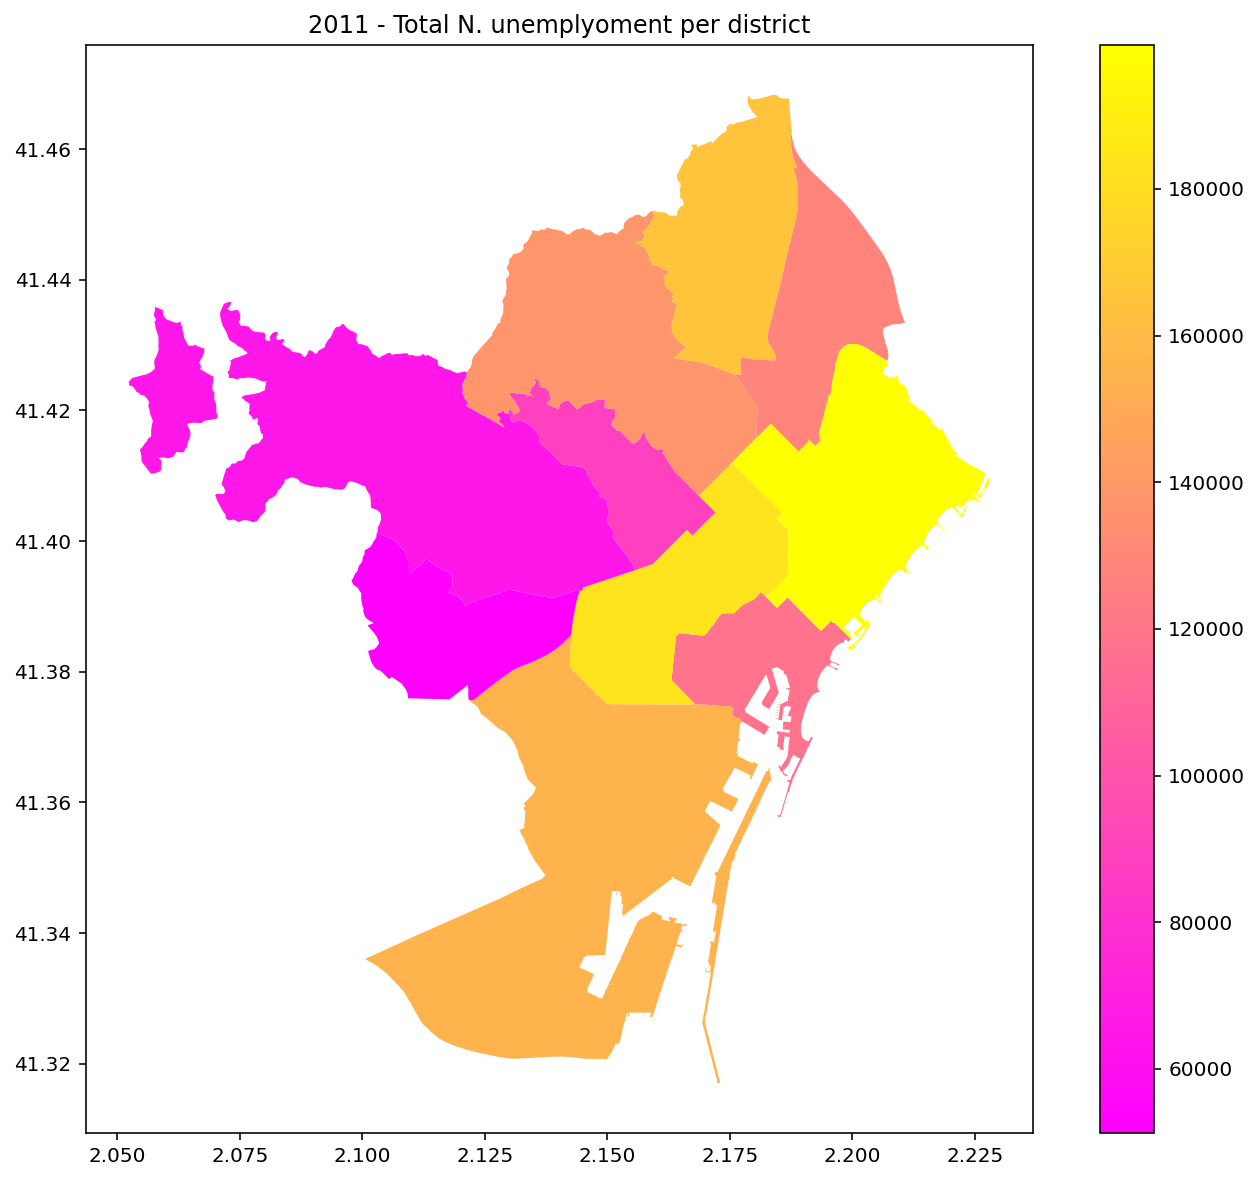

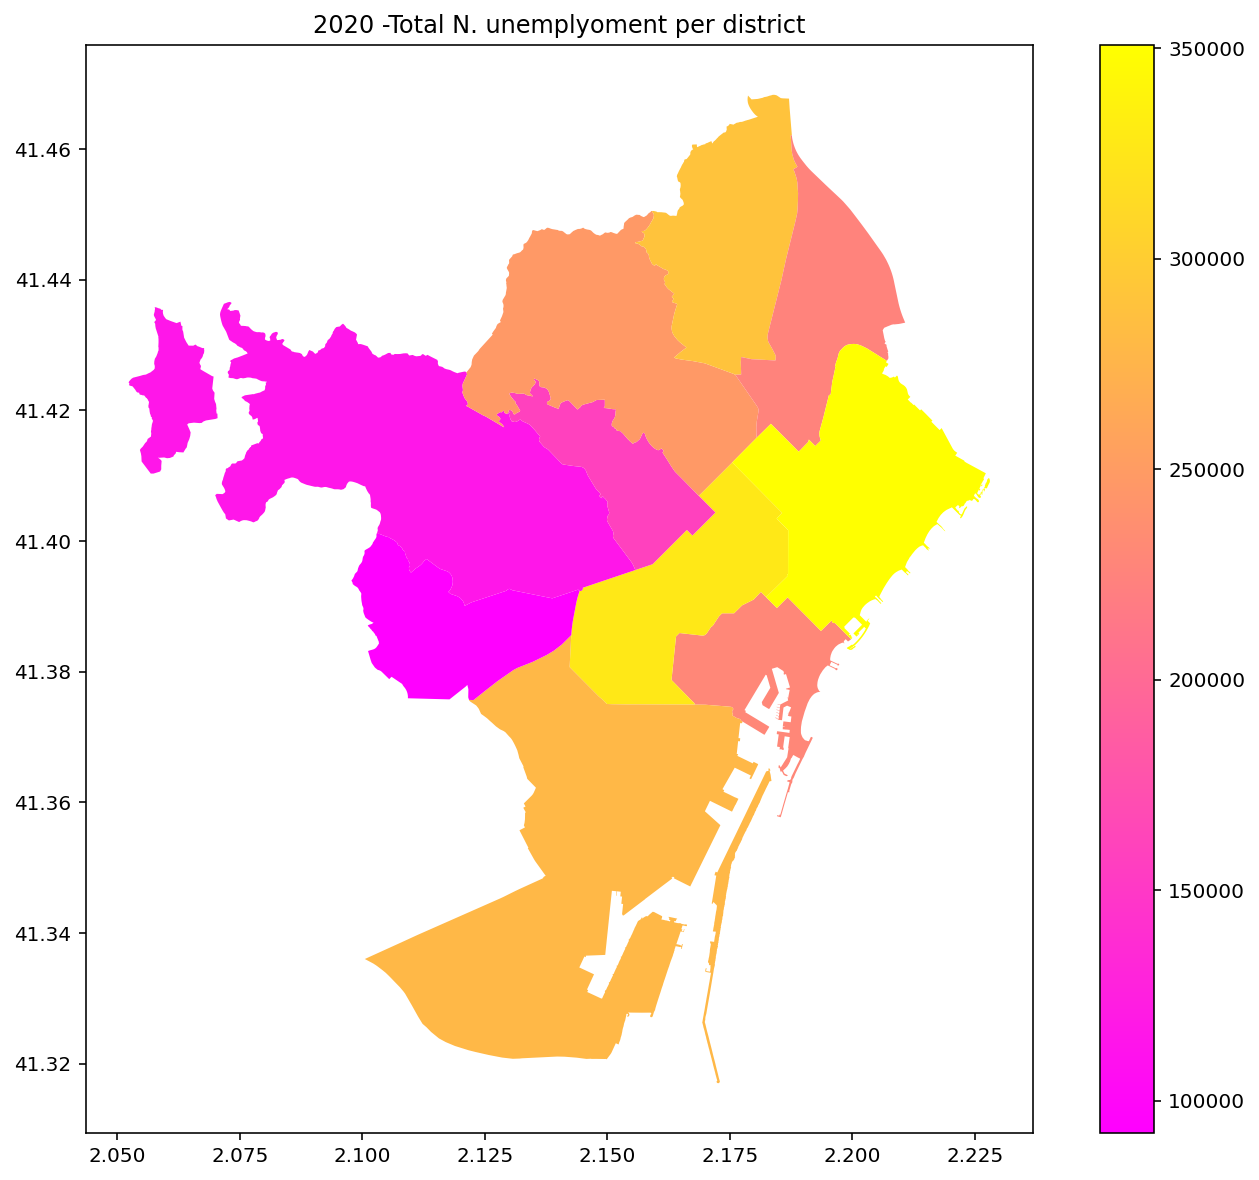

In [109]:
from pylab import rcParams
from geopandas import GeoDataFrame
rcParams['figure.figsize'] =12,10
clean_2011 = GeoDataFrame(clean_2011)
clean_2020 = GeoDataFrame(clean_2020)


ax.set_aspect('equal')
clean_2011.plot(column='2011', cmap='spring', legend=True);
_ = plt.title('2011 - Total N. unemplyoment per district')


ax.set_aspect('equal')
clean_2020.plot(column='2020', cmap='spring', legend=True);
_ = plt.title('2020 -Total N. unemplyoment per district')


In [0]:
#### unemplyoment men vs women 

In [1]:
final

NameError: name 'final' is not defined